In [28]:
import numpy as np 
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [29]:
transform = transforms.ToTensor() #definido a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)#Carrega parte de validação do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #Cria buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)#Carrega parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) #Cria buffer para pegar os dados por partes

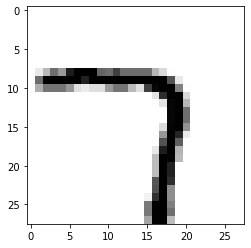

In [36]:
dataiter = iter(trainloader)
imagens, etiquetas = dataiter.next()
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r')

In [31]:

print(imagens[0].shape)#Verificar tam do tensor de cada img
print(etiquetas[0].shape) #Verificar a dimensão do tensor da etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [32]:
#Estrutura da rede inception
class Modelo(nn.Module):
  def _init_(self):
      super(Modelo, self)._init_()
      self.linear1 = nn.Linear(28*28, 128) #camada de entrada, 784 neurônios que se ligam a 128
      self.linear2 = nn.Linear(128, 64) #camada interna 1, 128 neurônios que se ligam a 64
      self.linear1 = nn.Linear(64, 10) #camada interna 2, 64 neurônios que se ligam a 10
      # para a camada de saída não é necessário nada, pois só precisamos pegar o output da cama interna 2
      #Quanto maior camadas, maior o desempenho, consequentemente, maior gasto de processamento

def forward(self,X):
  X = F.relu(self.linear1(X)) # função de ativação da camada de entrada para a cama interna 1
  X = F.relu(self.linear2(X)) # função de ativação da camada de entrada para a cama interna 2
  X = self.linear3(X) # função de ativação da camada interna 2 para a cama de saída, nesse caso f(x) = x
  return F.log_softmax(X, dim=1) # dados utilizados para calcular a pera

In [33]:
#Otimizador da rede, estrutura de treinamento

def treino(modelo, trainloader, device):

    otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) #Define a política de atualização dos pesos e da bias
    inicio = time() #timer para sabermos quanto tempo levou o treino

    criterio = nn.NLLLoss() #definido o criterio para calcular a perda
    EPOCHS = 10 #número de EPOCHS que o algoritmo rodará, um bom treinamento seria pelo menos 100 EPOCHS
    modelo.train() #ativando o modo de treinamento do modelo

    for spoch in range(EPOCHS):
        perda_acumulada = 0 #Inicialização de perda acumulada da epoch em questão

        for imagens, etiquetas in trainloader:
        
            imagens = imagens.view(imagens.shape[0], -1) #Convertendo as imagens para "vetores" de 28*28 casas para ficarem compatíveis com a
            otimizador.zero_grad() #zerando os gradientes por conta do ciclo anterior

            output = modelo(imagens.to(device)) #colocando os dados no modelo
            perda_instantanea = criterio(output, etiquetas.to(device)) # Calculando a perda da epoch em questão

            perda_instantanea.backward() #back propagation a partir da perda

            otimizador.step() #Atualizando os pesos e bias

            perda_acumulada += perda_instantanea.item() #atualização de perda acumulada

    else:
        print("Epoch {} - Perda resultante. {}".format(epoch+1, perda_acumulada/len(trainloader)))
    print("\n Informe do treino(em minutos) = ", (timer)-inicio/60)

In [34]:
#Algoritmo de validação

def validacao(modelo, valloader, device):
    conta_corretas = 0
    conta_todas = 0
    for imagens, etiquetas in valloader:
      for i in range(len(etiquetas)):
        img = imagens[i].view(1, 784)
        #Desativar o autograd para acelerar a validação, Grafos computacionais dinâmicos tem um custo alto de processamento
        with torch.no_grad():
            logps = modelo(img.to(device)) #output do modelo em escala logaritmica

        ps = torch.exp(logps)   #Converte output para escala normal(Lembrando que é um tensor)
        probab = list(pc.cpu().numpy()[0])
        etiqueta_pred = probab.index(max(probab)) #converte o tensor em um número, no caso, o número que o modelo previu
        eitqueta_curta = etiquetas.numpy()[i]
        if(etiqueta_curta == etiqueta_prod): #Compare a previsão com o valor correto
          conta_corretas += 1
        conta_todas += 1
    print("Total de imagens testadas =", conta_todas)
    print("Precisão do modelo = {}%", format(conta_corretas*100/conta_todas))

In [35]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Verificando se existe uma placa cuda, a unica placa que possui suporte ao cuda é a NVIDIA